# Vorstellung verschiedener Klassifikatoren
Dieses Jupyter Notebook zeigt die Entscheidungsregionen verschiedener Klassifikatoren und veranschaulicht wie Entscheidungsbäume und der Gaussian Naive Bayes einen neuen Datenpunkt klassieren.


#### Aufbau
- **Importieren aller benötigten Module und Funktionen.**
- **Definition verschiedener Funktionen.**
- **Einstellungen für die verwendeten Funktionen.**
- **Erstellung eines Datensatzes und aus diesem einen Trainingsdatensatz.**
- **Veranschaulichung der Entscheidungsregionen sechs verschiedener Klassifikatoren.**
- **Veranschaulichung der Normalverteilungen, welche der Gaussian Naive Bayes für die Klassierung eines Datenpunktes nutzt.**
- **Veranschaulichung der Baumstrukturen zweier Entscheidungsbäume mit einem verschiedenen Aufspaltungskriterium der Knoten.**
- **Veranschaulichung, wie ein Datenpunkt einen den Entscheidungsbaum mit dem Gini-Kriterium durchläuft.**

##### Importieren aller benötigten Module und Funktionen.

In [369]:
# matplotlib:
# Visualisierung der Diagramme direkt im Notebook.
%matplotlib inline
# Importieren des Moduls matplotlib unter dem Namen mpl.
import matplotlib as mpl
# Extraktion von Rot-, Grün- und Blauwert
from matplotlib.colors import to_rgb



# sklearn:
# Importieren von Klassifikatoren
# Importieren der Funktion KNeighborsClassifier aus dem Modul sklearn.neighbors .
from sklearn.neighbors import KNeighborsClassifier
# Importieren der Funktion DecisionTreeClassifier aus dem Modul sklearn.tree .
from sklearn.tree import DecisionTreeClassifier
# Importieren der Funktion RandomForestClassifier aus dem Modul sklearn.ensemble .
from sklearn.ensemble import RandomForestClassifier
# Importieren der Funktion GaussianNB aus dem Modul sklearn.naive_bayes .
from sklearn.naive_bayes import GaussianNB
# Erstellung von Datensätzen
# Importieren der Funktion make_classification aus dem Modul sklearn.datasets .
from sklearn.datasets import make_classification
# Importieren der Funktion train_test_split aus dem Modul sklearn.model_selection .
from sklearn.model_selection import train_test_split


# mlxtend:
# Import um Entscheidungsregionen von Klassifikatoren zu zeichnen.
from mlxtend.plotting import plot_decision_regions
# Import um ein Streudiagramm zu zeichnen.
from mlxtend.plotting import category_scatter

# Import zur Visualisierung der Baumstruktur.
from dtreeviz.trees import *

# Matheoperationen:
import scipy.stats as stats
import math

##### Definition verschiedener Funktionen.
Funktion zur Abspeicherung von Bildern.

In [370]:
# fig_id legt den Namen des abgespeicherten Bildes fest.
# tight_layout passt automatisch die Größe mehrerer untergeordneter Graphen an, damit diese sich nicht überschneiden.
# fig_extension legt den Datentyp des abgespeicherten Bildes fest.
# resolution bestimmt die Auflösung des Bildes.
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Funktion um einen Datensatz bestehend aus den zwei Variablen X (Attributsausprägungen) und y (Klassenzuordnungen) in ein einzelnes Dataframe umzuwandeln. Ein DataFrame ist dabei ein Datentyp aus der Softwarebibliothek pandas und vereinfacht den Umgang mit Datensätzen: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html>

In [371]:
def to_df(X,y):
    df_x = pd.DataFrame(X)
    df_y = pd.DataFrame(y)

    df = pd.concat([df_x, df_y], axis=1, join="inner")
    df.columns = ['feature_1', 'feature_2', 'label']
    df['label'] = df['label'].astype(str)
    return df

Funktion um aus einer Reihe von Daten die Varianz zu ermitteln.

In [372]:
def varianz(feature_values, erwartungswert):
    i=0
    sum=0
    while i<len(feature_values):
        feature_values[i]-=erwartungswert
        feature_values[i]=feature_values[i]**2
        sum+=feature_values[i]
        i+=1
    varianz=sum/len(feature_values)
    return varianz

##### Einstellungen für die verschiedenen Funktionen
Einstellungen für den Zufallsgenerator der Funktion train_test_split (<https://scikit-learn.org/stable/glossary.html#term-random_state>) und die Anzeige von Graphen.

In [373]:
# Anschauliche Bäume für random einen random_state=12. Diese Zahl kann für andere Bäume beliebig abgeändert werden.
random = 12

# Einstellungen für die Achsenbeschriftungen.
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

Erstellung eines Speicherorts für die Graphen.

In [374]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cl_bsp_project_"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

##### Erstellung und Visualisierung eines Datensatzes und eines Trainingsdatensatzes
Erstellung eines synthetischen Datensatzes und Überführung in ein DataFrame.

In [375]:
# Der Datensatz besteht aus 50 Datenpunkten welche 2 verschiedenen Klassen zugeordnet werden können, die jeweils gleich viele Punkte aufweisen.
X, y = make_classification(n_classes=2, class_sep=0.5,
                           weights=[0.5, 0.5], n_informative=2, n_redundant=0, flip_y=0,
                           n_features=2, n_clusters_per_class=1, n_samples=50, random_state=42)

# Überführung des Datensatzes in ein DataFrame
df = to_df(X, y)

Darstellung des Datensatzes in einem Streudiagramm.

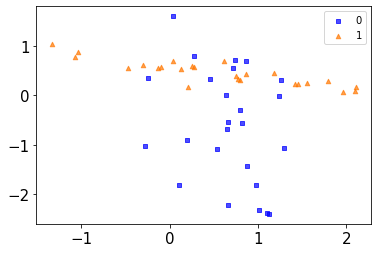

In [376]:
category_scatter('feature_1', 'feature_2',label_col='label', data=df, markers='s^', colors=('blue', '#ff7700'))
plt.show()

Aufteilung des Datensatzes in einen Test und einen Trainingsdatensatz. Der Testdatensatz entspricht dabei 20% des ursprünglichen Datensatzes.

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random)

Visualisierung des Test- und des Trainingsdatensatzes.

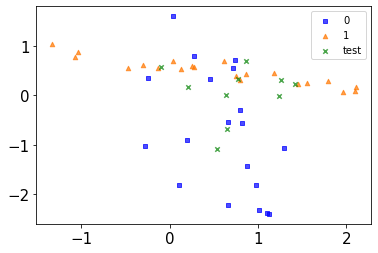

In [378]:
# Abänderung der Klassenzuordnung im Testdatensatz in 'test' zur Visualisierung
y_test = y_test.astype(str)
i=0
while i < len(y_test):
    y_test[i] = 'test'
    i+=1

# Zusammenführung von Trainings- und Testdatensatz zur Visualisierung
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
y_new = pd.concat([y_train, y_test], axis=0, join="inner", ignore_index=True)

X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
X_new = pd.concat([X_train, X_test], axis=0, join="inner", ignore_index=True)

df_new = to_df(X_new,y_new)

# Streudiagramm des Trainings- und Testdatensatzes
category_scatter('feature_1', 'feature_2',label_col='label', data=df_new, markers='s^x', colors=('blue', '#ff7700', 'green'))
plt.show()

##### Veranschaulichung der Entscheidungsregionen sechs verschiedener Klassifikatoren
Initialisierung sechs verschiedener Klassifikatoren.

In [379]:
classifier_list= [# Initialisieren des KNeighborsClassifier.
    # n_neighbors=5 bedeutet, dass für die Klassierung eines Punktes die Information von 5 Nachbarn beachtet wird.
    # n_jobs=-1 bedeutet, dass für die Berechnungen alle Kerne des CPU genutzt werden (-> schneller).
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    # Initialisieren des DecisionTreeClassifier mit dem Blatt-Aufspaltungskriterium 'gini' und dem random_state=42 um reproduzierbare Ergebnisse zu ermöglichen.
    DecisionTreeClassifier(criterion='gini', random_state=42),
    # Initialisieren des DecisionTreeClassifier mit dem Blatt-Aufspaltungskriterium 'entropy' und dem random_state=42 um reproduzierbare Ergebnisse zu ermöglichen.
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    # Initialisieren eines RandomForestClassifier.
    # n_estimators=10 bedeutet, dass 10 Bäume erzeugt werden, welche das Voting übernehmen.
    # max_leaf_nodes=16 bedeutet, dass ein einzelner Baum der erzeugt wird, maximal 16 Blattknoten besitzen darf.
    # Festlegen des random_state auf 42 damit das Ergebnis reproduzierbar bleibt.
    # n_jobs=-1 bedeutet, dass für die Berechnungen alle Kerne des CPU genutzt werden (-> schneller).
    # criterion='entropy' legt Gini als Kriterium zur Aufspaltung der Knoten in den Entscheidungsbäumen fest.
    RandomForestClassifier(n_estimators=10, max_leaf_nodes=16, random_state=42, n_jobs=-1, criterion='gini'),
    # Initialisieren eines RandomForestClassifier.
    # n_estimators=10 bedeutet, dass 10 Bäume erzeugt werden, welche das Voting übernehmen.
    # max_leaf_nodes=16 bedeutet dass ein einzelner Baum der erzeugt wird, maximal 16 Blattknoten besitzen darf.
    # Festlegen des random_state auf 42 damit das Ergebnis reproduzierbar bleibt.
    # n_jobs=-1 bedeutet, dass für die Berechnungen alle Kerne des CPU genutzt werden (-> schneller).
    # criterion='entropy' legt die Entropie als Kriterium zur Aufspaltung der Knoten in den Entscheidungsbäumen fest.
    RandomForestClassifier(n_estimators=10, max_leaf_nodes=16, random_state=42, n_jobs=-1, criterion='entropy'),
    # Initialisieren eines Gaussian Naive Bayes.
    GaussianNB(),
    ]

# Beschriftungen der Klassifikatoren
labels = ['K_Nearest_Neighbors',
          'Decision_Tree_Gini',
          'Decision_Tree_Entropy',
          'Random_Forest_Gini',
          'Random_Forest_Entropy',
          'Gaussian_Naive_Bayes'
          ]

Visualisierung der Entscheidungsregionen

In [380]:
# Abänderung des Formates von y_train für die Funktion fit
y_train = y_train.values.ravel()

Saving figure bsp_plot_K_Nearest_Neighbors


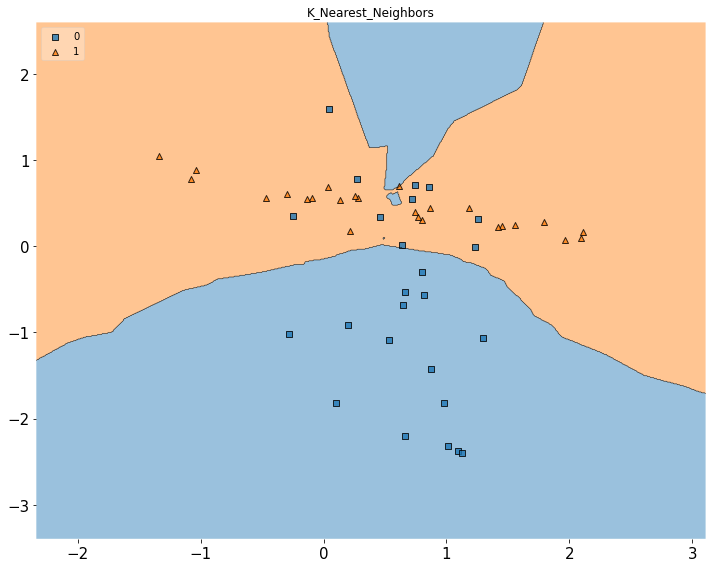

Saving figure bsp_plot_Decision_Tree_Gini


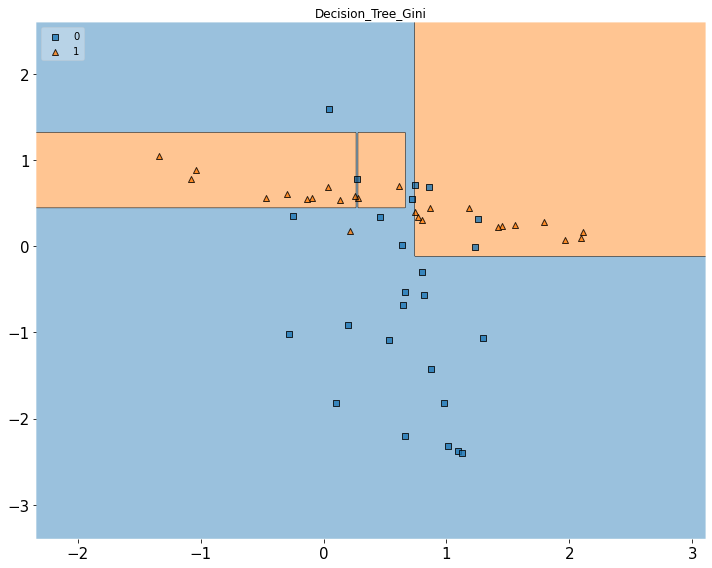

Saving figure bsp_plot_Decision_Tree_Entropy


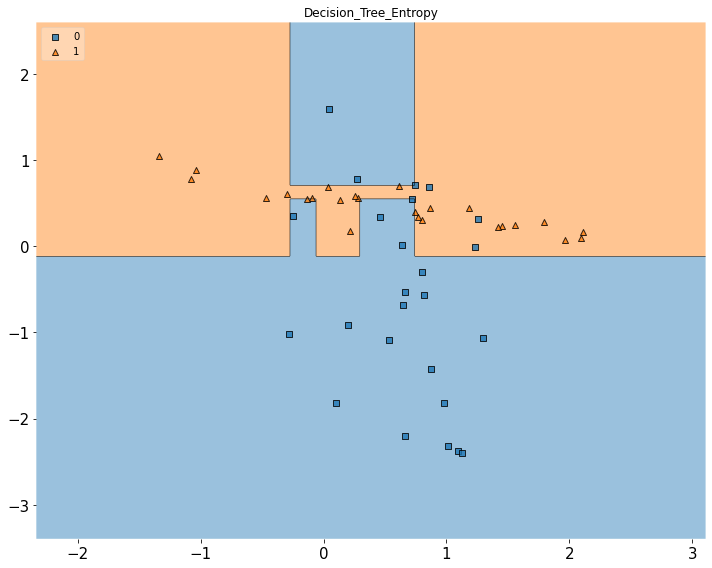

Saving figure bsp_plot_Random_Forest_Gini


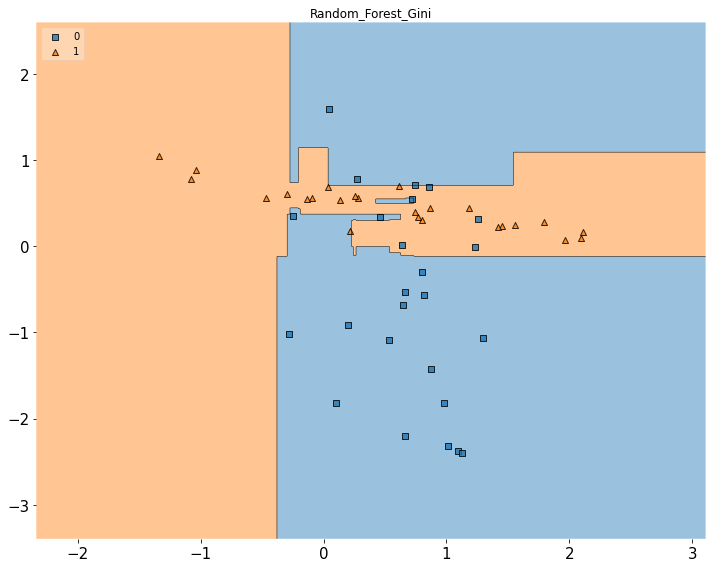

Saving figure bsp_plot_Random_Forest_Entropy


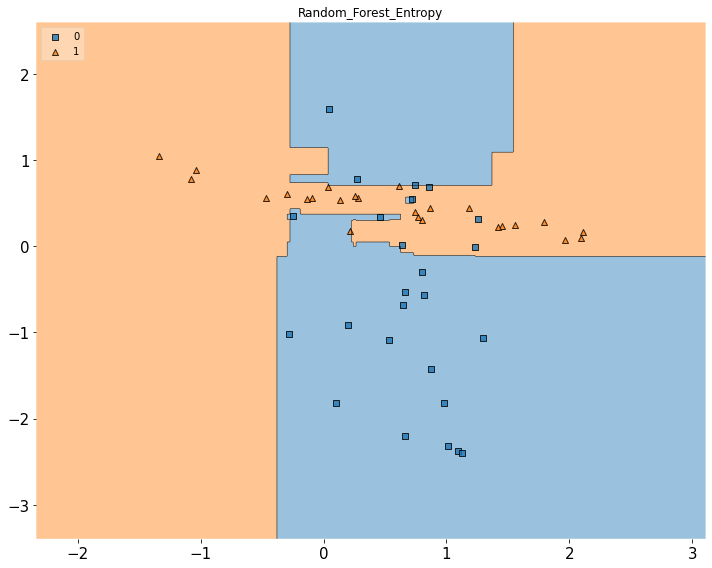

Saving figure bsp_plot_Gaussian_Naive_Bayes


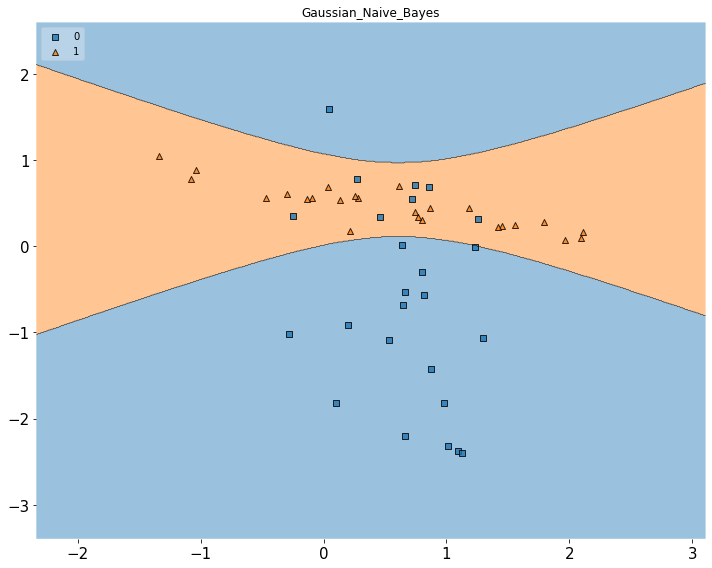

In [381]:
# Iterieren über alle Klassifikatoren
i=0
for clf in classifier_list:
    # Einstellen der Bildgröße
    fig = plt.figure(figsize=(10, 8))
    # Training eines Klassifikators
    clf.fit(X_train, y_train)
    # Abbildung der Entscheidungsregionen des trainierten Klassifikators
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    # Beschriftung der Abbildung
    plt.title(labels[i])
    # Festlegen eines Namens
    fig_name = 'bsp_plot_' + labels[i]
    # Abspeichern
    save_fig(fig_name)
    # Anzeigen der Abbildung
    plt.show()
    i+=1

##### Veranschaulichung der Normalverteilungen, welche der Gaussian Naive Bayes für die Klassierung eines Datenpunktes nutzt.
Berechnung der geschätzten Erwartungswerte der Normalverteilungen. Diese entspricht dem Mittelwert der entsprechenden Attributsausprägungen. Für eine Herleitung der Schätzer seien Leser:innen auf den Anhang der Bachelorarbeit verwiesen.

In [382]:
# Abspeichern der Summe aller Attributsausprägungen eines Attributes. Die Klassenzugehörigkeit des Datenpunktes mit der Attributsausprägung wird ebenfalls beachtet.
sum_f1_c0=0
sum_f1_c1=0
sum_f2_c0=0
sum_f2_c1=0

# Initialisierung zweier Zähler zur Iteration.
counter_c0=0
counter_c1=0

# Initalisierung von 4 Arrays in denen die Attributsausprägungen eines Attributes abgespeichert werden. Die Klassenzugehörigkeit des Datenpunktes mit der Attributsausprägung wird ebenfalls beachtet.
f1_c0_array=[]
f1_c1_array=[]
f2_c0_array=[]
f2_c1_array=[]

# Befüllen der angelegten Variablen.
i=0
while i< len(X_train):
    if y_train[i]==0:
        sum_f1_c0+=X_train[0][i]
        f1_c0_array.append(X_train[0][i])
        sum_f2_c0+=X_train[1][i]
        f2_c0_array.append(X_train[1][i])
        counter_c0+=1
    if y_train[i]==1:
        sum_f1_c1+=X_train[0][i]
        f1_c1_array.append(X_train[0][i])
        sum_f2_c1+=X_train[1][i]
        f2_c1_array.append(X_train[1][i])
        counter_c1+=1
    i+=1

# Berechnung des Erwartungswert/Mittelwertes
mu_f1_c0=sum_f1_c0/counter_c0
mu_f1_c1=sum_f1_c1/counter_c1
mu_f2_c0=sum_f2_c0/counter_c0
mu_f2_c1=sum_f2_c1/counter_c1

print('Die Summe der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 0 ist ' + sum_f1_c0.astype(str) + '. Der Erwartungswert/Mittelwert ist ' + mu_f1_c0.astype(str) + '.')
print('Die Summe der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 1 ist ' + sum_f1_c1.astype(str) + '. Der Erwartungswert/Mittelwert ist ' + mu_f1_c1.astype(str) + '.')
print('Die Summe der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 0 ist ' + sum_f2_c0.astype(str) + '. Der Erwartungswert/Mittelwert ist ' + mu_f2_c0.astype(str) + '.')
print('Die Summe der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 1 ist ' + sum_f2_c1.astype(str) + '. Der Erwartungswert/Mittelwert ist ' + mu_f2_c1.astype(str) + '.')

Die Summe der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 0 ist 11.332096126797408. Der Erwartungswert/Mittelwert ist 0.5964261119367057.
Die Summe der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 1 ist 11.524996809225193. Der Erwartungswert/Mittelwert ist 0.5488093718678664.
Die Summe der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 0 ist -14.404768246281847. Der Erwartungswert/Mittelwert ist -0.7581456971727288.
Die Summe der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 1 ist 10.187469303496043. Der Erwartungswert/Mittelwert ist 0.4851175858807639.


Berechnung der geschätzten Varianzen der Normalverteilungen.

In [383]:
var_f1_c0=varianz(f1_c0_array,mu_f1_c0)
var_f1_c1=varianz(f1_c1_array,mu_f1_c1)
var_f2_c0=varianz(f2_c0_array,mu_f2_c0)
var_f2_c1=varianz(f2_c1_array,mu_f2_c1)

print('Die Varianz der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 0 ist ' + var_f1_c0.astype(str) + '.')
print('Die Varianz der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 1 ist ' + var_f1_c1.astype(str) + '.')
print('Die Varianz der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 0 ist ' + var_f2_c0.astype(str) + '.')
print('Die Varianz der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 1 ist ' + var_f2_c1.astype(str) + '.')

Die Varianz der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 0 ist 0.20378593293585018.
Die Varianz der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 1 ist 1.066055381777965.
Die Varianz der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 0 ist 1.4342040288041777.
Die Varianz der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 1 ist 0.06301351215795137.


Graphische Darstellung der Normalverteilungen.

Die Standardabweichung der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 0 ist 0.45142655320201336.
Die Standardabweichung der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 1 ist 1.0324995795534084.
Die Standardabweichung der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 0 ist 1.197582577029316.
Die Standardabweichung der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 1 ist 0.25102492338003285.
Saving figure nb_norm_vert_f1_f2


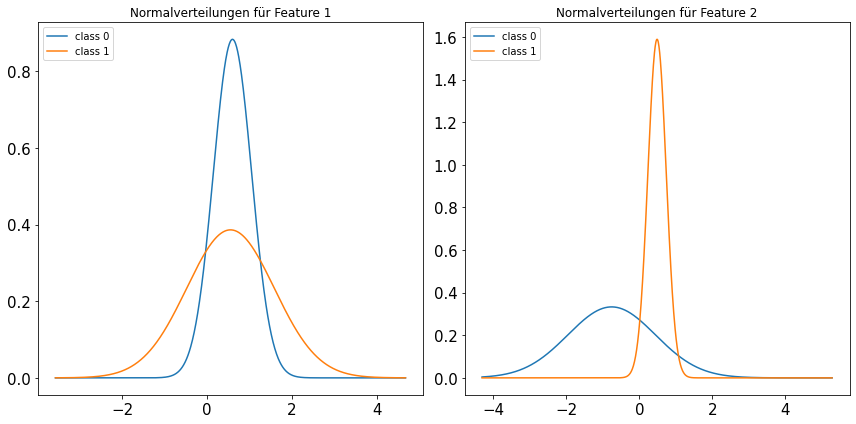

In [384]:
# Anlegen der Graphen und Einstellen der Größe
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Berechnung der Standardabweichung für die nachfolgend genutzte Normalverteilungsfunktion
sigma_f1_c0 = math.sqrt(var_f1_c0)
sigma_f1_c1 = math.sqrt(var_f1_c1)
sigma_f2_c0 = math.sqrt(var_f2_c0)
sigma_f2_c1 = math.sqrt(var_f2_c1)

print('Die Standardabweichung der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 0 ist ' + str(sigma_f1_c0) + '.')
print('Die Standardabweichung der Attributsausprägungen von Attribut feature_1 der Datenpunkte aus Klasse 1 ist ' + str(sigma_f1_c1) + '.')
print('Die Standardabweichung der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 0 ist ' + str(sigma_f2_c0) + '.')
print('Die Standardabweichung der Attributsausprägungen von Attribut feature_2 der Datenpunkte aus Klasse 1 ist ' + str(sigma_f2_c1) + '.')

# Erstellung der Graphen für feature_1
# Schritte auf der x-Achse
x_f1 = np.linspace(mu_f1_c1 - 4*sigma_f1_c1, mu_f1_c1 + 4*sigma_f1_c1, 1000)
# Normalverteilung für die Klasse 0
ax1.plot(x_f1, stats.norm.pdf(x_f1, mu_f1_c0, sigma_f1_c0), label='class 0')
# Normalverteilung für die Klasse 1
ax1.plot(x_f1, stats.norm.pdf(x_f1, mu_f1_c1, sigma_f1_c1), label='class 1')
# Platzierung der Legende
ax1.legend(loc="upper left")
# Titel des Graphen
ax1.set_title('Normalverteilungen für Feature 1')

# Erstellung der Graphen für feature_2
# Schritte auf der x-Achse
x_f2 = np.linspace(mu_f2_c1 - 4*sigma_f2_c0, mu_f2_c1 + 4*sigma_f2_c0, 1000)
# Normalverteilung für die Klasse 0
ax2.plot(x_f2, stats.norm.pdf(x_f2, mu_f2_c0, sigma_f2_c0), label='class 0')
# Normalverteilung für die Klasse 1
ax2.plot(x_f2, stats.norm.pdf(x_f2, mu_f2_c1, sigma_f2_c1), label='class 1')
# Platzierung der Legende
ax2.legend(loc="upper left")
# Titel des Graphen
ax2.set_title('Normalverteilungen für Feature 2')
# Abspeichern der Abbildung
save_fig('nb_norm_vert_f1_f2')
# Anzeigen der Abbildung
plt.show()

##### Veranschaulichung der Baumstrukturen zweier Entscheidungsbäume mit einem verschiedenen Aufspaltungskriterium der Knoten.
In diesen Entscheidungsbäumen werden die Schranken der Attribute angegeben, an welchem ein Knoten aufgespaltet wird. Zusätzlich ist der Wert des Unreinheitsmaßes angegeben und wie viele Datenpunkte den jeweiligen Klassen angehören. Die Farbe der Knoten ist mit dem Grad der Unreinheit skaliert.

Veranschaulichung der Baumstruktur für den Entscheidungsbaum mit dem Gini-Kriterium.

Saving figure dt_gini_vis_fixed


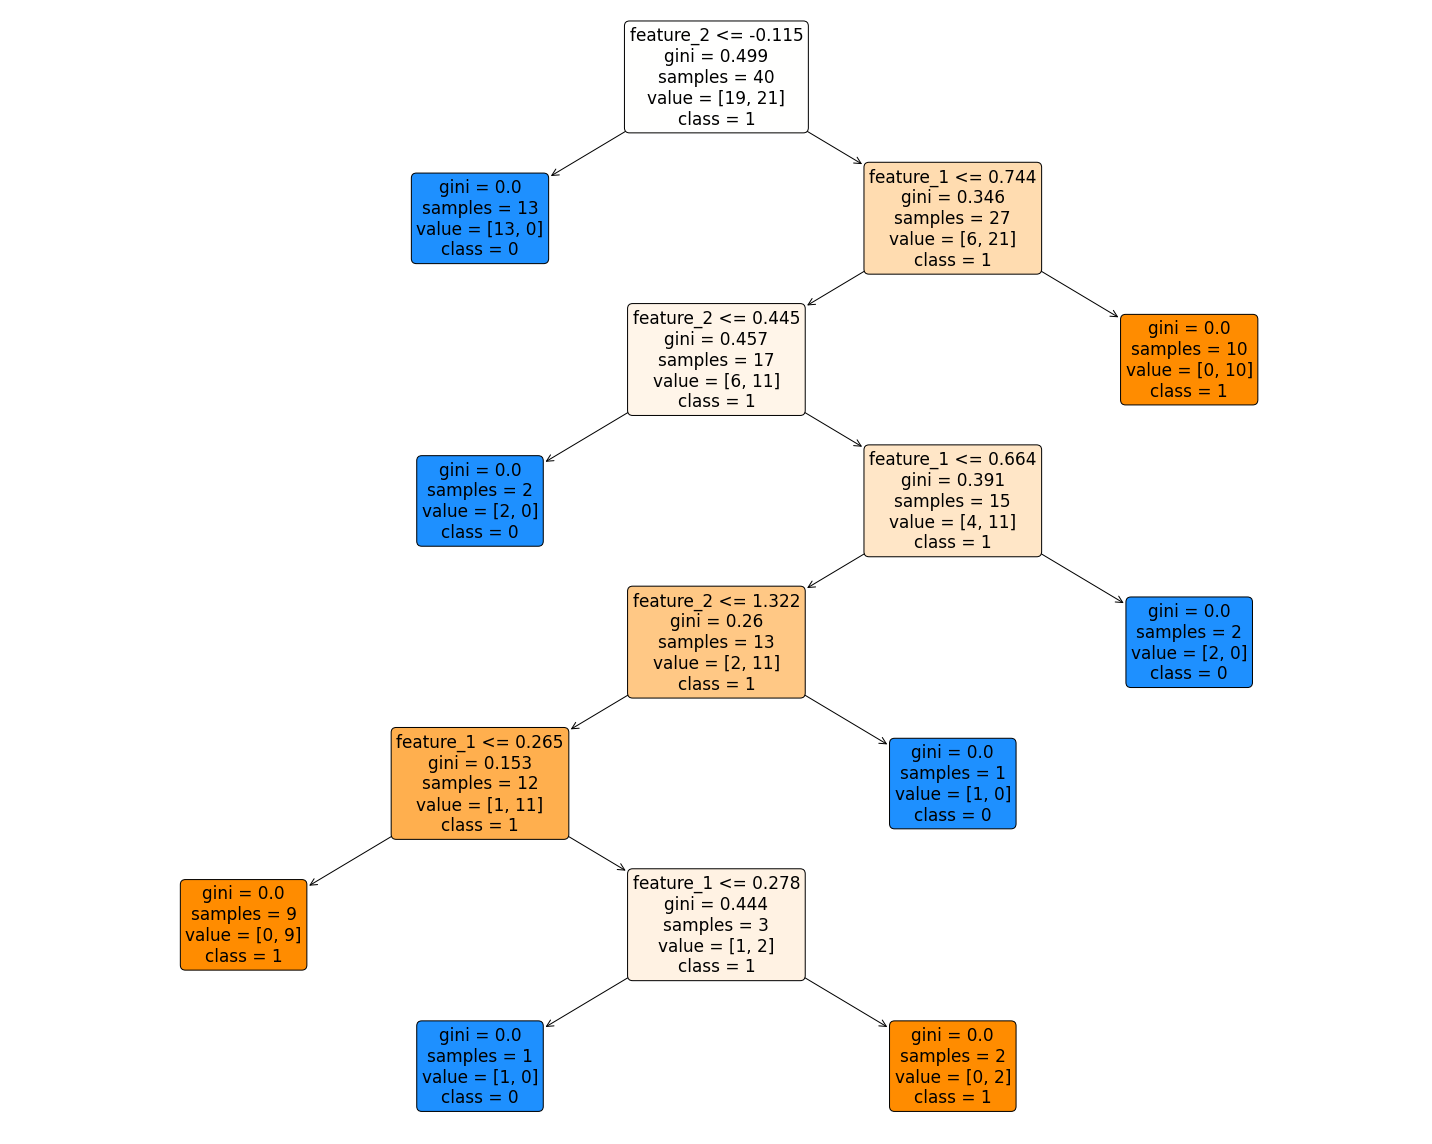

In [385]:
# Initalisierung der Abbildung und ihrer Größe
fig = plt.figure(figsize=(20, 16))

# Einstellung der Farben für die beiden Klassen.
colors = ['dodgerblue', 'darkorange']

# Abspeichern der Baumstruktur.
samples = tree.plot_tree(classifier_list[1], feature_names=['feature_1', 'feature_2'], class_names=['0', '1'],
                         filled=True, rounded=True)

# Verfärbung des Entscheidungsbaumes.
for sample, impurity, value in zip(samples, classifier_list[1].tree_.impurity, classifier_list[1].tree_.value):
    # Der maximale Wert für eine der Klassen entscheidet die Farbe; Diese wird basierend auf dem Grad der Unreinheit erhellt.
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 2
    sample.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    # Randfarbe der Boxen
    sample.get_bbox_patch().set_edgecolor('black')

# Abspeichern der Abbildung
save_fig('dt_gini_vis')

Veranschaulichung der Baumstruktur für den Entscheidungsbaum mit dem Information Gain Kriterium / der Informationsentropie.

Saving figure dt_entropy_vis_fixed


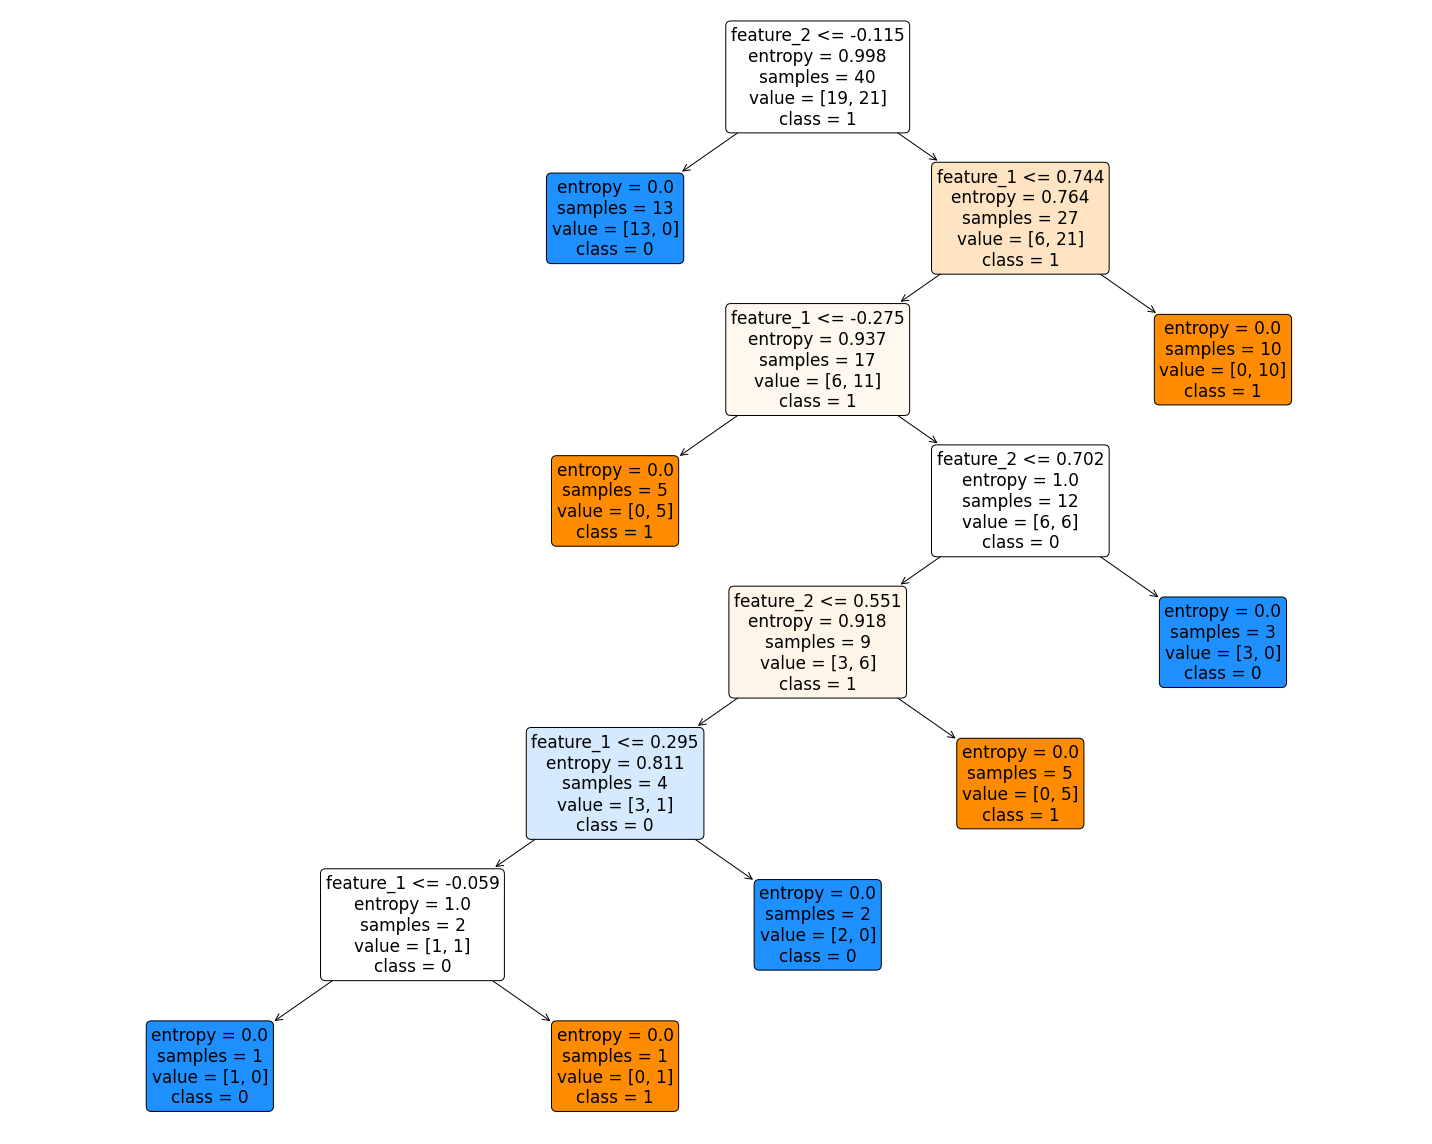

In [386]:
# Analoge Vorgehensweise zur vorherigen Zelle. Nun entscheidet jedoch die Informationsentropie.
fig = plt.figure(figsize=(20, 16))
colors = ['dodgerblue', 'darkorange']

samples = tree.plot_tree(classifier_list[2], feature_names=['feature_1', 'feature_2'], class_names=['0', '1'],
                         filled=True, rounded=True)
for sample, impurity, value in zip(samples, classifier_list[2].tree_.impurity/2, classifier_list[2].tree_.value):
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 2
    sample.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    sample.get_bbox_patch().set_edgecolor('black')

fig.tight_layout()
save_fig('dt_entropy_vis')

##### Veranschaulichung, wie ein Datenpunkt den Entscheidungsbaum mit dem Gini-Kriterium durchläuft.
Die Abbildung zeigt Histogramme der Mengen an Datenpunkten, welche durch die einzelnen Knoten im Baum symbolisiert werden. Die Schranke zur Aufspaltung wird durch ein kleines graues Dreieck symbolisiert. Die Position der Attributsausprägung des Datenpunktes ist mit einem grünen Dreieck markiert. Je nach Position des grünen Dreiecks wählt der Datenpunkt entweder die rechte oder die linke Seite eines Knotens um den Baum zu durchlaufen. Ist ein Blatt erreicht, so wird dem Datenpunkt eine Klasse zugeordnet.

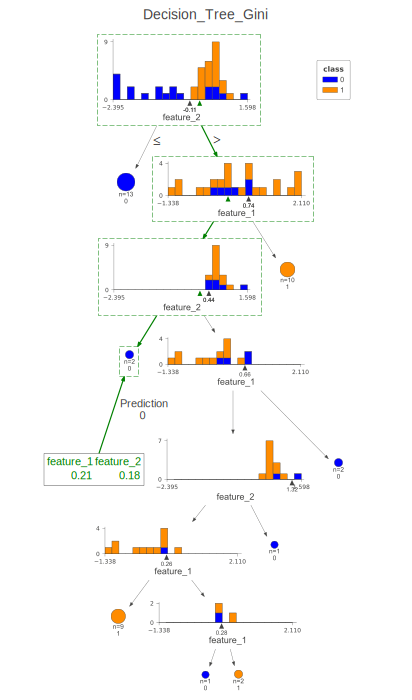

In [387]:
# Auswahl eines Testdatenpunktes. Dieser kann beliebig abgeändert werden und zeigt dementsprechend unterschiedliche Wege im Entscheidungsbaum.
test = X_test.loc[1,:]

# Farbauswahl für die Klassen
color_blind_friendly_colors = [
    None,  # 0 classes
    None,  # 1 class
    ['#0000ff', '#ff8c00'],  # 2 classes
    ]

# Veranschaulichung des Weges eines Datenpunkts im Entscheidungsbaum mit dem Gini-Kriterium.
viz = dtreeviz(classifier_list[1], x_data=X_train, y_data=y_train,
               target_name="class",
               feature_names=['feature_1', 'feature_2'],
               class_names=['0', '1'],
               title='Decision_Tree_Gini',
               colors={'classes' : color_blind_friendly_colors, 'highlight' : '#008000ff'},
               X=test
               )

viz.save(IMAGES_PATH +'/testsample_gini.svg')
viz